In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("darkgrid")
from scipy import stats
sns.plt = plt
np.random.seed(1) # No estoy seguro si es necesario


ImportError: No module named pandas

In [2]:
df = pd.read_csv('tiempos.txt', sep=' ')

print(df.describe())

print(df.to_string(index=False))


          Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
count  12.000000   12.000000       12.000000      12.000000
mean    6.500000   13.908333       13.866667      33.158333
std     3.605551    2.025949        1.789024      49.079332
min     1.000000   11.000000       11.300000      18.200000
25%     3.750000   12.150000       12.475000      18.775000
50%     6.500000   14.400000       14.100000      19.050000
75%     9.250000   15.350000       14.950000      19.250000
max    12.000000   17.000000       16.700000     189.000000
Atleta  tiempo_sol  tiempo_nublado  tiempo_lluvia
     1        11.1            11.3           19.4
     2        13.0            12.8           18.2
     3        16.1            16.0           19.0
     4        14.5            14.1           18.9
     5        12.0            12.5           19.1
     6        11.0            11.6           18.7
     7        15.1            14.6          189.0
     8        14.4            14.2           19.9
     9    

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


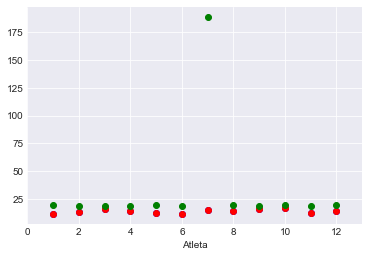

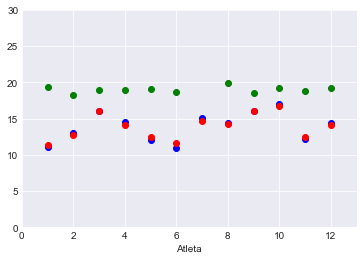

In [3]:
df = pd.read_csv('tiempos.txt', sep=' ')
sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")
plt.show()

sns.tsplot(time=df['Atleta'], data=df['tiempo_sol'], interpolate=False, color="blue")
sns.tsplot(time=df['Atleta'], data=df['tiempo_nublado'], interpolate=False, color="red")
sns.tsplot(time=df['Atleta'], data=df['tiempo_lluvia'], interpolate=False, color="green")

LLUVIA_LIMIT = 30
sns.plt.ylim((0,LLUVIA_LIMIT))
sns.plt.show()


In [60]:

# Respuesta a : Los atletas son m´as lentos en d´ıas de lluvia que en d´ıas soleados.

# Vamos a ver si los atletas son mas lentos en dias de lluvia que en dias soleados.
#para eso vamos a hacer un test de permutacion

# Creo numpy array con datos soleados y datos de lluvia sin outlier en tuplas indicando su grupo
datos_sol = df.values[:,1]
datos_lluvia = np.array(filter(lambda x : x < LLUVIA_LIMIT, df.values[:,3]))

delta_0 = np.median(datos_lluvia) - np.median(datos_sol)
print(delta_0)

datos_bool =  np.concatenate([np.zeros(datos_lluvia.size, dtype=bool),np.ones(datos_sol.size, dtype=bool)])
datos_val = np.concatenate([datos_sol,datos_lluvia])

PERM_COUNT = 100000

def simulate():
    perm = np.random.permutation(datos_bool)
    ll_sum = 0
    ll_count = 0
    s_sum = 0
    s_count = 0
    for is_soleado, val in zip(perm, datos_val):
        if is_soleado:
            s_count += 1
            s_sum += val
        else:
            ll_count += 1
            ll_sum += val
    return (ll_sum/ll_count) - (s_sum/s_count)
        
deltas = np.array([simulate() for i in range(PERM_COUNT)])
reject_delta_count = len(filter(lambda x: x > delta_0, deltas))
print(reject_delta_count)
print(float(reject_delta_count)/PERM_COUNT)


sns.distplot(deltas, kde=False, rug=False)
sns.plt.show()







TypeError: unsupported operand type(s) for /: 'filter' and 'int'

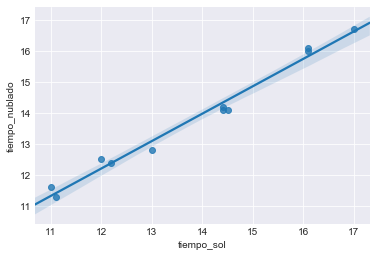

(0.99224199979513195, 1.8469595486418115e-09)


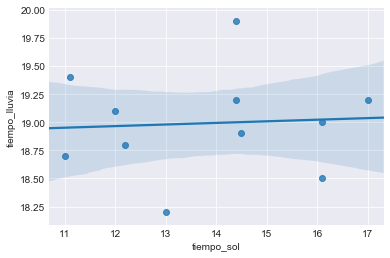

(0.064963553876733887, 0.84949358072453474)
RanksumsResult(statistic=-3.9727331518303837, pvalue=7.1052632886001551e-05)


In [68]:
# Respuesta a : Si sirve de algo entrenar en lluvia

# Observacion: interpretamos que "sirve" entrenar con lluvia si los atletas pueden "rendir" en la lluvia
# de manera acorde a su capacidad en otras condiciones.

# Sacamos el outlier de tiempo_lluvia
df2 = df[df['tiempo_lluvia'] < LLUVIA_LIMIT]

# Ver 1: los atletas rinden acordemente bajo sol a cuando hay cielo nublado.
# Esto es importante porque podria ser que los atletas rindan muy bien debido al sol,
# y que lo raro sea como rinden en buenas condiciones climaticas. Pero si rinden parecido bajo sol y nublado
# pero de manera distinta bajo lluvia, el problema seria la lluvia.

# Ver 1.1: cuando esta nublado, los datos varian de forma similar a cuando hay sol

sns.regplot(x=df2['tiempo_sol'], y=df2['tiempo_nublado'])
sns.plt.show()

# Ver 1.2: hay una correlacion lineal alta entre los datos de cielo nublado y soleado

print(stats.pearsonr(df2['tiempo_sol'],df2['tiempo_nublado']))

# Ver 2: los atletas no rinden acordemente bajo sol a cuando llueve

# Ver 2.1: predecir el rendimiento de los atletas segun los datos de los dias que llueve
# produce malos estimadores para los dias soleados

sns.regplot(x=df2['tiempo_sol'], y=df2['tiempo_lluvia'])
sns.plt.show()

# Ver 2.2: la correlacion lineal es muy baja si comparamos los dias que llueve a los dias soleados

print(stats.pearsonr(df2['tiempo_sol'],df2['tiempo_lluvia']))

# Ver 2.3: segun el test 'Wilcoxon rank-sum', es poco probable que las muestras vengan de la misma distribucion

print(stats.ranksums(df2['tiempo_sol'],df2['tiempo_lluvia']))

# Explicacion: este test toma como Hipotesis nula que las dos muestras vienen de una misma distribucion.
# Como podemos ver, el p-valor obtenido es increiblemente bajo. Lo que quiere decir que es altamente
# probable que la hipotesis nula sea falsa.



# Conclusion: cuando llueve, los atletas no parecen rendir acordemente a sus capacidades en otras condiciones. Por lo tanto,
# bajo nuestra interpretacion y las estimaciones obtenidas, entrenar bajo lluvia no sirve.



In [62]:
# RTA a : El cielo nublado no influye en los tiempos de los atletas.

datos_sol = df.values[:,1]
datos_nublado = df.values[:,2]

# Si el tiempo nublado influyese entonces tendrian distinta media

# Hipotesis : No tienen la misma media
# Hipotesis nula: Tienen la misma media
# Tomamos como estadistico a 0.05

print(stats.ttest_rel(datos_sol,datos_nublado))

# Con el p-valor arrojado, no podemos rechazar la hipotesis nula.
# No tenemos suficiente informacion para saber si tienen o no la misma media.
# Si tuvieran distinta media, segun el test, el p-valor deberia dar menor a 0.05

print(stats.wilcoxon(datos_sol, datos_nublado, zero_method='wilcox', correction=False))



Ttest_relResult(statistic=0.41213824986058739, pvalue=0.68815561156045579)
WilcoxonResult(statistic=28.5, pvalue=0.68820650307382913)


In [ ]:
# Rta a: La velocidad en dias de lluvia es independiente del atleta

a = np.ones(11)
a[0] = 0.999
print(stats.pearsonr(df2['tiempo_lluvia'],df2['Atleta']))

sns.regplot(x=df2['Atleta'], y=df2['tiempo_lluvia'])
sns.plt.show()



In [ ]:
# El clima influye en la velocidad de los atletas
#Claramente si,  no sabemos como hacerlo